<a href="https://colab.research.google.com/github/daniela-estevez/ProyectoIntegrador/blob/main/Avance6_Equipo13_ModeloFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/daniela-estevez/ProyectoIntegrador/blob/main/Avance6_Equipo13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avance 6. Conclusiones clave

## Equipo 13

## Alejandro García Hernández A01793812
## Daniela Estevez Rodriguez A01793723
## Carlos Alberto López Álvarez A01168193

## Objetivos

En este avance, se busca fundamentar si es viable implementar el modelo, evaluando su adecuación a los criterios de éxito previamente establecidos y considerando los resultados obtenidos durante la etapa de modelado.

A través de las últimas 6 semanas hemos ido trabajando en diferentes etapas de la creación de un modelo, desde el EDA, preprocesamiento de datos, hasta probar decenas de modelos y combinaciones de los mismos.

De esta manera en nuestro el el notebook de Avance6_Equipo13_Anexo que adjuntamos a esta entrega llegamos a un modelo final que es un modelo de ensamble de regresión logística y SVM.

En este código se encontrara la versión final de modelo entrenado usando pipelines.

*Nota: Todo el razonamiento de porque llegamos a ese modelo se encuentra en el Avance6_Anexo_Equipo13*

*Nota2: Si hemos trabajado en la parte del pipeline, sin embargo, estamos teniendo problemas para que nos quede listo, por lo que decidimos concentrar nuestros esfuerzos en la entrega del modelo final que presentamos aqui y en el pdf.

## 0. Librerías

In [ ]:
import warnings

warnings.filterwarnings("ignore")
import time

# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

In [ ]:
# Librerías a utilizar para el pre procesamiento.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder


<IPython.core.display.Javascript object>

In [ ]:
# Librerías para la sección de modelos supervisados y ensambles
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    RepeatedStratifiedKFold,
    GridSearchCV,
    cross_val_predict,
)
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    accuracy_score,
    classification_report,
    recall_score,
    make_scorer,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier

from sklearn.ensemble import BaggingClassifier

from imblearn.under_sampling import (
    RandomUnderSampler,
    TomekLinks,
    EditedNearestNeighbours,
)
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.ensemble import (
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)

from IPython.display import display_html

<IPython.core.display.Javascript object>

In [ ]:
# El siguiente bloque se agregó para poder leer los archivos drive
# from google.colab import drive
# drive.mount('/content/drive')
#%cd /content/drive/MyDrive/Colab Notebooks/Proyecto Integrador

<IPython.core.display.Javascript object>

In [ ]:
# Función para mostrar los DataFrames uno junto al otro con estilos
def display_side_by_side(dfs, captions, color="lightgreen", axis=0):
    html_str = ""
    for caption, df in zip(captions, dfs):
        html_str += '<div style="display: inline-block; padding: 10px;">'
        html_str += f"<h3>{caption}</h3>"
        html_str += df.style.highlight_max(color=color, axis=axis).to_html()
        html_str += "</div>"
    display_html(html_str, raw=True)

<IPython.core.display.Javascript object>

## 1. Preparación de datos

Se aplica el pre procesamiento de los datos que se ha trabajado en semanas anteriores. Así, obtenemos dos conjuntos de datos para poder trabajar los datos con diferentes modelos. En el primer conjunto las variables ordinales son codificadas con LabelEncoder y en el segundo conjunto se les aplica OHE.

In [ ]:
data = pd.read_csv("base.csv", sep=",", encoding="latin1")
df = data.copy()

<IPython.core.display.Javascript object>

In [ ]:
eliminar = [
    "Nombre",
    "residencia",
    "fecha_nacimiento",
    "fecha_1er_visita",
    "FECHA_INICIO_ACTUAL_EPISODIO",
    "GESTA",
    "CAFe_TAZAS_DIA",
    "LACTANCIA",
    "DEPENDENCIA_SUSTANCIAS_ACTUAL",
    "EMBARAZO_ACTUAL_SEMANAS",
    "TENSION_PREMENSTRUAL",
    "ABUSO_SUSTANCIAS_ANTERIOR",
    "CGI-S.3",
    "HISTORIA_PSIQUIATRICA_FAMILIAR",
    "DEPENDENCIA_SUSTANCIAS_ANTERIOR",
    "RITMO",
    "DX_TERCIARIO",
    "ABUSO_SUSTANCIAS_ACTUAL",
    "OCUPACIoN_PACIENTE",
    "DX_SECUNDARIO",
    "EDAD_SUSPENSION",
    "CODIGO_DX.3",
    "AniOS_TABAQUSMO",
    "POSIBILIDAD_EMBARAZO",
    "CANTIDAD",
    "FRECUENCIA_alcohol",
    "CIGARROS_DIA",
    "CODIGO_DX.2",
    "CESAREA",
    "INICIO_TABACO",
    "METODO_ANTICONCEPTIVO",
    "num_EPISODIOS_PREVIOS",
    "PARA",
    "ABORTO",
    "GRADO_FAMILIAR",
    "CGI-S.2",
    "A4_MALESTAR_PROBLEMAS_RELACIONES_INTERPERSONALES",
    "CONDUCTA_SUICIDA_REMISION_TEMPRANA",
    "B4_VOCES_SUEniOS_INTENCION_SUICIDA",
    "B6_PENSO_MEDIO_SUICIDARSE",
    "B7_PENSO_LUGAR_SUICIDIO",
    "B9_PENSO_FINALIZAR_ALGO_ANTES_SUICIDIO",
    "B11_INTENSION_MORIR_EN_SUICIDIO",
    "B12_NECESIDAD_MORIR_ANTES_PLAN_SUICIDIO",
    "B13_DIFICULTAD_RESISTIR_IMPULSO_SUICIDIO",
    "B14_INTENTO_MORIR",
    "B14a_INICIO_ACCIONES_INTENTO_SUICIDIO",
    "B14b_INICIO_ACCIONES_INTENTO_SUICIDIO_SIN_LASTIMARSE",
    "B14c_INICIO_ACCIONES_INTENTO_SUICIDIO_LO_DETUVIERON",
    "B15_SE_LESIONO_SIN_SUICIDIO",
    "B16_INTENTO_SUICIDARSE",
    "B16a_COMENZO_INTENTO_SUICIDIO_SIN_FINANALIZAR",
    "B16b_COMENZO_INTENTO_SUICIDIO_LO_INTERRUMPIERON",
    "B16c_TERMINO_INTENTO_SUICIDIO",
    "B17_TIEMPO_DEDICADO_A_PENSAMIENTO_SUICIDA",
    "B19_POSIBILIDAD_SUICIDARSE_TRES_MESES_SIGUIENTES",
    "B_tot_SI_ALGUNA_PREGUNTA_B",
    "EPISODIO_MAYOR_total_vida",
    "SUICIDALIDAD_ACTUAL",
    "SUICIDALIDAD_INTENTO_total_vida",
    "B1b_INTENCION_DE_MORIR_EN_ACCIDENTE",
    "B5_PENSO_METODO_SUICIDARSE",
    "B8_PENSO_FECHA_SUICIDIO",
    "B10_INTENCION_SUICIDIO",
    "B18_INTENTO_SUICIDARSE",
    "B2_NECESIDAD_DE_ESTAR_MUERTO",
    "TRASTORNO_MAYOR_PASADO",
    "CODIGO_DX.1",
    "Puntaje_experto",
    "tiempo_alcohol",
    "A4_MALESTAR_PROBLEMAS_RELACIONES_INTERPERSONALES",
    "Tipo_droga",
    "Consumo_alcohol",
    "cafe_te_negro",
    "Consumo_drogas",
    "CGI-S.2",
    "TABAQUISMO",
    "Frecuencia_Fumar",
    "tiempo_droga",
]

# Eliminamos características que no necesitamos
df = df.drop(eliminar, axis=1)

<IPython.core.display.Javascript object>

In [ ]:
# Listas de columnas
booleanas = [
    "A1_DEPRIMIDO_DOS_SEMANAS",
    "A2_MENOS_INTERES_DOS_SEMANAS",
    "A3a_CAMBIO_PESO_UN_MES",
    "A3b_DIFICULTADES_DORMIR",
    "A3c_HABLA_MAS_LENTA",
    "A3d_MAS_CANSANCIO",
    "A3e_SINTO_INUTIL_CULPABLE",
    "A3f_DIFICULTAD_CONCENTRACION",
    "A3g_PENSAMIENTO_INTENCION_SUICIDIO",
    "A5_INTERVALO_DE_MIN_DOS_MESES_SIN_DEPRESION",
    "EPISODIO_DEPRESIVO_MAYOR_ACTUAL",
    "EPISODIO_DEPRESIVO_MAYOR_PASADO",
    "EPISODIO_DEPRESIVO_MAYOR_RECURRENTE",
    "TRASTORNO_MAYOR_ACTUAL",
    "TRASTORNO_MAYOR_RECURRENTE",
    "CONDUCTA_SUICIDA_ACTUAL",
    "B1_ACCIDENTE",
    "B1a_INTENCION_DE_LASTIMARSE_EN_ACCIDENTE",
    "B3_PENSO_EN_SUICIDIO",
]

categoricas = [
    "SEXO",
    "CONDICION_ACTUAL",
    "ESTADO_civil",
    "RELIGION",
    "PROVEEDOR_FAMILIAR",
    "OCUPACIoN_JEFE_FAMILIA",
    "ESCOLARIDAD__JEFE_FAMILIA",
    "ESCOLARIDAD_MAXIMA_PX",
    "DX_PRIMARIO",
    "TRASTORNO_MAYOR_DIAGNOSTICO",
    "Riesgo_suicidio",
]

# Actualizamos el tipo de las columnas categoricas usando astype()
for column in booleanas:
    df[column] = df[column].astype(bool)

for column in categoricas:
    df[column] = df[column].astype("category")

# Actualizamos el tipo de la columna MENARCA a uno numérico usando astype()
df["MENARCA"] = df["MENARCA"].astype("float64")

<IPython.core.display.Javascript object>

In [ ]:
# Sustituir los valores de MENARCA donde SEXO es "M"
df.loc[df["SEXO"] == "M", "MENARCA"] = -1

# Imputar la moda a las variables numéricas
for columna in df.select_dtypes(include="number").columns:
    df[columna] = df[columna].fillna(df[columna].median())

# Imputar la moda a las variables booleanas
for columna in df.select_dtypes(include="bool").columns:
    moda = df[columna].mode()[0]  # Calcular la moda
    df[columna] = df[columna].fillna(moda)

# Imputar la moda a las variables alfanuméricas
for columna in df.select_dtypes(include="category").columns:
    moda = df[columna].mode()[0]  # Calcular la moda
    df[columna] = df[columna].fillna(moda)

<IPython.core.display.Javascript object>

In [ ]:
# Lista de variables que son en realidad enteros
enteros_cols = [
    "EDAD_1era_visita",
    "EDAD_INICIO_1er_EPISODIO",
    "AnioS_ESTUDIO_PACIENTE",
    "MENARCA",
    "INICIO_VIDA_SEXUAL_ACTIVA",
    "MADRS_TOTAL",
    "CGI-S.1",
]

# Actualizamos el tipo de las columnas de enteros usando astype()
for column in enteros_cols:
    df[column] = df[column].astype("int64")

<IPython.core.display.Javascript object>

In [ ]:
# Reemplazar el valor 1955 por la mediana
df["EDAD_INICIO_1er_EPISODIO"] = df["EDAD_INICIO_1er_EPISODIO"].replace(
    1955, df["EDAD_INICIO_1er_EPISODIO"].median()
)

# Reemplazar el valor 1 por la mediana
df["INICIO_VIDA_SEXUAL_ACTIVA"] = df["INICIO_VIDA_SEXUAL_ACTIVA"].replace(
    1, df["INICIO_VIDA_SEXUAL_ACTIVA"].median()
)

<IPython.core.display.Javascript object>

In [ ]:
# Transformamos las variables usando Winsonorización
df["INICIO_VIDA_SEXUAL_ACTIVA_W"] = winsorize(
    df["INICIO_VIDA_SEXUAL_ACTIVA"], limits=(0.05, 0.05)
)
df["DURACION_EPISODIO_MAYOR_ACTUAL_W"] = winsorize(
    df["DURACION_EPISODIO_MAYOR_ACTUAL"], limits=(0.05, 0.05)
)

# Eliminamos estas características originales
df = df.drop(["INICIO_VIDA_SEXUAL_ACTIVA", "DURACION_EPISODIO_MAYOR_ACTUAL"], axis=1)

<IPython.core.display.Javascript object>

In [ ]:
# Hacemos listas de las variables ordinales
cat_orginales = [
    "ESCOLARIDAD__JEFE_FAMILIA",
    "ESCOLARIDAD_MAXIMA_PX",
    "DX_PRIMARIO",
    "TRASTORNO_MAYOR_DIAGNOSTICO",
    "Riesgo_suicidio",
    "Sintomas_ansiosos",
]

<IPython.core.display.Javascript object>

In [ ]:
# Crear el encoder ordinal
encoder_1 = OrdinalEncoder(
    categories=[
        [
            "Menos de 6 años",
            "Primaria",
            "Secundaria",
            "Preparatoria",
            "Estudios universitarios no terminados",
            "Licenciatura",
            "Posgrado",
        ]
    ],
    dtype=int,
)
encoder_2 = OrdinalEncoder(
    categories=[
        [
            "Distimia",
            "Trastorno depresivo episodio único ",
            "Trastorno depresivo mayor recidivante",
        ]
    ],
    dtype=int,
)
encoder_3 = OrdinalEncoder(
    categories=[
        [
            "0",
            "TRASTORNO DEPRESIVO MAYOR",
            "TRASTORNO DEPRESIVO MAYOR EPISODIO UNICO O PRIMER EPISODIO",
            "TRASTORNO DEPRESIVO MAYOR RECURRENTE O RECIDIVANTE",
            "TRASTORNO DEPRESIVO MAYOR RECURRENTE RESISTENTE O SEVERO",
        ]
    ],
    dtype=int,
)
encoder_4 = OrdinalEncoder(categories=[["Leve", "Moderado", "Alto"]], dtype=int)
encoder_5 = OrdinalEncoder(categories=[["Leve", "Moderado-Grave"]], dtype=int)
encoder_6 = OrdinalEncoder(
    categories=[
        [
            "Primera aparición sin antecedente",
            "Indistinguible del pasado",
            "Recurrencia condición previa",
            "Significativamente diferente de condición previa",
            "Exageración de trastorno crónico",
        ]
    ],
    dtype=int,
)

# Ajustar y transformar los datos
df["ESCOLARIDAD__JEFE_FAMILIA_encoded"] = encoder_1.fit_transform(
    df[["ESCOLARIDAD__JEFE_FAMILIA"]]
)
df["ESCOLARIDAD_MAXIMA_PX_encoded"] = encoder_1.fit_transform(
    df[["ESCOLARIDAD_MAXIMA_PX"]]
)
df["DX_PRIMARIO_encoded"] = encoder_2.fit_transform(df[["DX_PRIMARIO"]])
df["TRASTORNO_MAYOR_DIAGNOSTICO_encoded"] = encoder_3.fit_transform(
    df[["TRASTORNO_MAYOR_DIAGNOSTICO"]]
)
df["Riesgo_suicidio_encoded"] = encoder_4.fit_transform(df[["Riesgo_suicidio"]])
df["Sintomas_ansiosos_encoded"] = encoder_5.fit_transform(df[["Sintomas_ansiosos"]])
df["CONDICION_ACTUAL_encoded"] = encoder_6.fit_transform(df[["CONDICION_ACTUAL"]])

<IPython.core.display.Javascript object>

In [ ]:
# Eliminamos estas características originales
df = df.drop(
    [
        "ESCOLARIDAD__JEFE_FAMILIA",
        "ESCOLARIDAD_MAXIMA_PX",
        "DX_PRIMARIO",
        "TRASTORNO_MAYOR_DIAGNOSTICO",
        "Riesgo_suicidio",
        "Sintomas_ansiosos",
        "CONDICION_ACTUAL",
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [ ]:
# Hacemos listas de las variables no ordinales
cat_no_ordinales = [
    "SEXO",
    "ESTADO_civil",
    "RELIGION",
    "PROVEEDOR_FAMILIAR",
    "OCUPACIoN_JEFE_FAMILIA",
]

<IPython.core.display.Javascript object>

In [ ]:
# Aplicar Get_dummies asegurando de eliminar la primera categoría
df = pd.get_dummies(df, columns=cat_no_ordinales, drop_first=True)

<IPython.core.display.Javascript object>

In [ ]:
# Generamos la base con las características y la variable de salida
X = df.drop(columns=["Sintomas_ansiosos_encoded"])
y = df["Sintomas_ansiosos_encoded"]
Xtv, Xtest, ytv, ytest = train_test_split(X, y, train_size=0.9, random_state=0)

<IPython.core.display.Javascript object>

## **2 Mejor Modelo - Stacking con Regresión logística y SVM**

In [ ]:
# Definimos el modelo
start_time_fit = time.time()
reg = LogisticRegression(
    solver="liblinear",
    class_weight="balanced",
    max_iter=100,
    penalty="l2",
    tol=0.0001,
    random_state=0,
)

# Se ajusta el modelo
reg.fit(Xtv, ytv)
end_time_fit = time.time()
tiempo_fit_reg = end_time_fit - start_time_fit

preds_reg_tv = reg.predict_proba(Xtv)[:, 1]
preds_reg_test = reg.predict_proba(Xtest)[:, 1]

<IPython.core.display.Javascript object>

In [ ]:
# Definimos el modelo
start_time_fit = time.time()
svm = SVC(
    class_weight="balanced",
    probability=True,
    C=0.01,
    gamma=0.001,
    kernel="linear",
    random_state=0,
)

# Se ajusta el modelo
svm.fit(Xtv, ytv)
end_time_fit = time.time()
tiempo_fit_svm = end_time_fit - start_time_fit

preds_svm_tv = svm.predict_proba(Xtv)[:, 1]
preds_svm_test = svm.predict_proba(Xtest)[:, 1]

<IPython.core.display.Javascript object>

In [ ]:
# Creamos el conjunto de datos para el ensamble
stacked_tv = np.column_stack((preds_reg_tv, preds_svm_tv))
stacked_test = np.column_stack((preds_reg_test, preds_svm_test))

<IPython.core.display.Javascript object>

In [ ]:
# Definir los modelos
start_time = time.time()
ensamble1 = LogisticRegression()

# Medir el tiempo de ajuste del ensamble
ensamble1.fit(stacked_tv, ytv)
tiempo_fit_ensamble1 = time.time() - start_time

# Evaluamos el rendimiento de los modelos con el conjunto de entrenamiento
ytv1_pred_ensamble1 = ensamble1.predict(stacked_tv)
recall_tv_ensamble1 = recall_score(ytv, ytv1_pred_ensamble1, average="binary")
recall_tv_macro_ensamble1 = recall_score(ytv, ytv1_pred_ensamble1, average="macro")
f1_tv_ensamble1 = f1_score(ytv, ytv1_pred_ensamble1, average="binary")


# Evaluamos el rendimiento de los modelos con el conjunto de pruebas
ytest1_pred_ensamble1 = ensamble1.predict(stacked_test)
recall_test_ensamble1 = recall_score(ytest, ytest1_pred_ensamble1, average="binary")
recall_test_macro_ensamble1 = recall_score(
    ytest, ytest1_pred_ensamble1, average="macro"
)
f1_test_ensamble1 = f1_score(ytest, ytest1_pred_ensamble1, average="binary")

cuadro = {
    "Metrica": ["Recall", "Recall Macro", "F1 Score"],
    "Entrenamiento": [recall_tv_ensamble1, recall_tv_macro_ensamble1, f1_tv_ensamble1],
    "Prueba": [recall_test_ensamble1, recall_test_macro_ensamble1, f1_test_ensamble1],
}

# Crear un DataFrame para almacenar los resultados
cuadro_df = pd.DataFrame(cuadro, index=cuadro["Metrica"])
cuadro_df.drop(columns=["Metrica"], inplace=True)

cuadro_df

,Entrenamiento,Prueba
Recall,0.877828,0.791667
Recall Macro,0.641393,0.538690
F1 Score,0.796715,0.716981


<IPython.core.display.Javascript object>

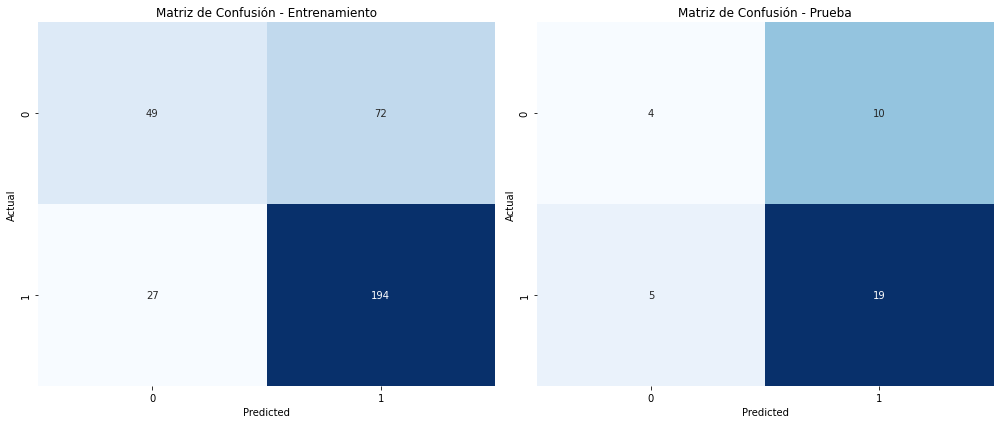

<IPython.core.display.Javascript object>

In [ ]:
# Generar las matrices de confusión
cm_tv = confusion_matrix(ytv, ytv1_pred_ensamble1)
cm_test = confusion_matrix(ytest, ytest1_pred_ensamble1)

# Crear DataFrames de las matrices de confusión
cm_tv_df = pd.DataFrame(cm_tv, index=[0, 1], columns=[0, 1])
cm_test_df = pd.DataFrame(cm_test, index=[0, 1], columns=[0, 1])

# Crear el heatmap usando seaborn
plt.figure(figsize=(14, 6))

# Heatmap de la matriz de confusión de entrenamiento
plt.subplot(1, 2, 1)
sns.heatmap(cm_tv_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión - Entrenamiento")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Heatmap de la matriz de confusión de prueba
plt.subplot(1, 2, 2)
sns.heatmap(cm_test_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión - Prueba")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Mostrar las gráficas
plt.tight_layout()
plt.show()